In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [57]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [58]:
data1=data.set_index('PassengerId')
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [59]:
data.shape

(891, 12)

The data contain 891 rows and 12 columns.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


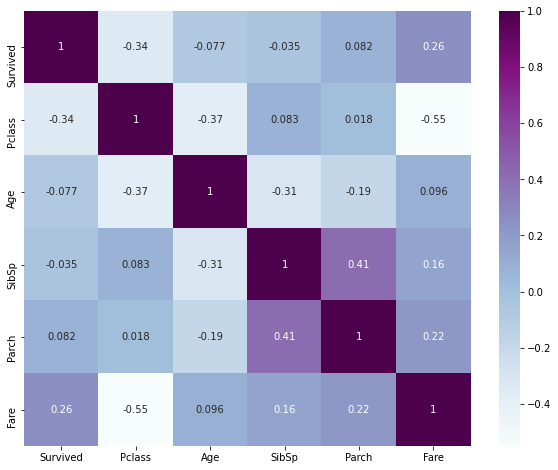

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(),cmap='BuPu',annot=True);

In [63]:
There is no or very less correlation amoung the different columns in the dataset.

SyntaxError: invalid syntax (<ipython-input-63-d5be802a09b5>, line 1)

In [64]:
data1.duplicated(keep='first').sum()

0

There are no duplicated values in the dataset.

# 4. Fill in all the missing values present in all the columns in the dataset

In [65]:
data1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are total of 866 missing values in the dataset. With 177, 687 and 2 missing values in columns Age, Cabin and Embarked respectively.

<AxesSubplot:ylabel='PassengerId'>

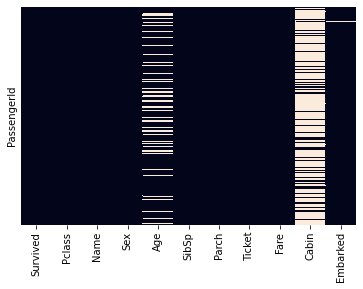

In [66]:
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False)

In [67]:
data1['Age']=data1['Age'].fillna(data1['Age'].mode()[0])
data1['Cabin']=data1['Cabin'].fillna(data1['Cabin'].mode()[0])
data1['Embarked']=data1['Embarked'].fillna(data1['Embarked'].mode()[0])

We fill the missing values with the help of mode.

In [68]:
data1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

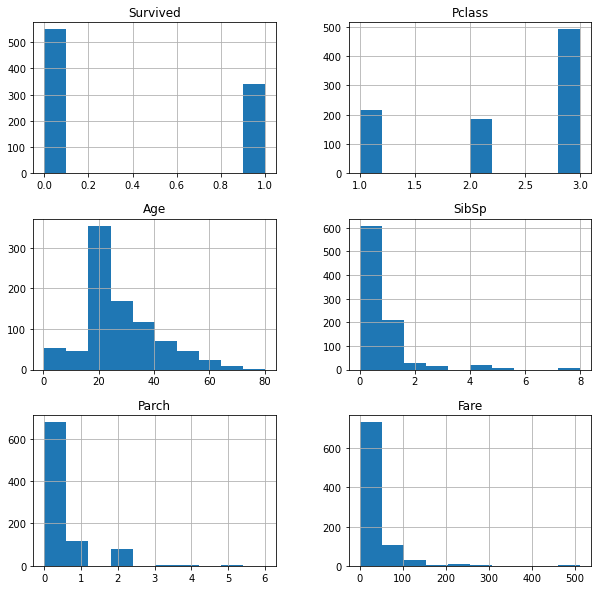

In [69]:
data1.hist(figsize=(10,10))
plt.show()

From the above graphs we can see that there are outliers in the columns Sibsp, Parch and Fare

Used the method of capping anf trimming to treat outliers.

In [70]:
Q1 = data1['SibSp'].quantile(0.25)
Q3 = data1['SibSp'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data1['SibSp']=np.where(data1['SibSp']>upper_whisker,upper_whisker,np.where(data1['SibSp']<lower_whisker,lower_whisker,data1['SibSp']))

In [71]:
Q1 = data1['Parch'].quantile(0.25)
Q3 = data1['Parch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data1['Parch']=np.where(data1['Parch']>upper_whisker,upper_whisker,np.where(data1['Parch']<lower_whisker,lower_whisker,data1['Parch']))

In [73]:
Q1 = data1['Fare'].quantile(0.25)
Q3 = data1['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data1['Fare']=np.where(data1['Fare']>upper_whisker,upper_whisker,np.where(data1['Fare']<lower_whisker,lower_whisker,data1['Fare']))

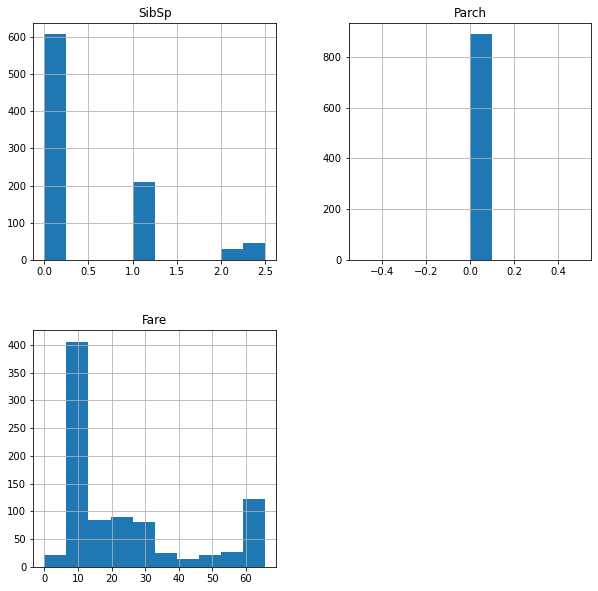

In [19]:
data2=data1[['SibSp','Parch','Fare']]
data2.hist(figsize=(10,10))
plt.show()

In [54]:
data2.describe()

,SibSp,Parch,Fare
count,891.000000,891.0,891.000000
mean,0.426487,0.0,24.046813
std,0.708246,0.0,20.481625
min,0.000000,0.0,0.000000
25%,0.000000,0.0,7.910400
50%,0.000000,0.0,14.454200
75%,1.000000,0.0,31.000000
max,2.500000,0.0,65.634400


We can see from above graphs that outliers are removed.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [38]:
from sklearn.preprocessing import MinMaxScaler
x=data1.drop(['Survived', 'Name', 'Ticket', 'Fare', 'Cabin' ],axis=1)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,male,22.0,1,0,S
2,1,female,38.0,1,0,C
3,3,female,26.0,0,0,S
4,1,female,35.0,1,0,S
5,3,male,35.0,0,0,S
...,...,...,...,...,...,...
887,2,male,27.0,0,0,S
888,1,female,19.0,0,0,S
889,3,female,NaN,1,2,S


In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    float64
 4   Parch   891 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 41.8+ KB


In [43]:
x=pd.get_dummies(x)
x

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,22.0,1,0,0,1,0,0,1
2,1,38.0,1,0,1,0,1,0,0
3,3,26.0,0,0,1,0,0,0,1
4,1,35.0,1,0,1,0,0,0,1
5,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,0,1,0,0,1
888,1,19.0,0,0,1,0,0,0,1
889,3,NaN,1,2,1,0,0,0,1


In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Sex_female  891 non-null    uint8  
 5   Sex_male    891 non-null    uint8  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 39.2 KB


In [51]:
x.describe()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.836071,14.526497,1.102743,0.806057,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,38.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x.to_numpy())
x_scaled = pd.DataFrame(data1_scaled, columns=['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'])
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()

Scaled Dataset Using MinMaxScaler


,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.472229,0.125,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.000,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.434531,0.000,0.0,0.0,1.0,0.0,0.0,1.0


In [53]:
x_scaled.describe()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.367921,0.065376,0.063599,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.418036,0.182540,0.137843,0.134343,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.247612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.472229,0.125000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
